# Question 1: Performance of schools with art programs versus no art programs

Questions associated with art programs vs. no art programs
2018-2019 Q10 "Which of the following art disciplines did you offer at your school this year (check all that apply)?"
2017-2018 Q10 "Which of the following art disciplines did you offer at your school this year (check all that apply)?"
2016-2017 Q10 "Which of the following art disciplines did you offer at your school this year (check all that apply)?"

In [77]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [78]:
#load data 
#resource for converting:https://medium.com/better-programming/using-python-to-convert-worksheets-in-an-excel-file-to-separate-csv-files-7dd406b652d7

#survey_2014_2015 = "2014-2015_Arts_Survey_Data.csv"
#survey_2015_2016 = "2015-2016_Arts_Survey_Data.csv"
survey_2016_2017 = "2016_-_2017_Arts_Survey_data.csv"
survey_2017_2018 = "2017-2018_Arts_Data_Report (1).csv"
survey_2018_2019 = "Copy of 2018 -2019 Arts Data Report.csv"
ELA_2013_2019 = "2013-2019 ELA State Test Results.csv"
Math_2013_2019 = "2013-2019 Math State Test Results.csv"

#survey_2014_2015_df = pd.read_csv(survey_2014_2015, encoding='utf-8', dtype = 'unicode')
#survey_2015_2016_df = pd.read_csv(survey_2015_2016, encoding='utf-8', dtype = 'unicode')
survey_2016_2017_df = pd.read_csv(survey_2016_2017, encoding='utf-8', dtype = 'unicode')
survey_2017_2018_df = pd.read_csv(survey_2017_2018, encoding='utf-8', dtype = 'unicode')
survey_2018_2019_df = pd.read_csv(survey_2018_2019, encoding='utf-8', dtype = 'unicode')
ELA_2013_2019_df = pd.read_csv(ELA_2013_2019, encoding='utf-8', dtype = 'unicode')
Math_2013_2019_df = pd.read_csv(Math_2013_2019, encoding='utf-8', dtype = 'unicode')

In [79]:
#Merge data by DBN and SchoolYear


#Add SchoolYear columns and SchoolYear to each survey file
survey_2016_2017_df["Year"] = '2017'
survey_2017_2018_df["Year"] = '2018'
survey_2018_2019_df["Year"] = '2019'

#Add subject to state test score files
ELA_2013_2019_df["Subject"] = 'ELA'
Math_2013_2019_df["Subject"] = 'Math'

#Change Q0_DBN column to just DBN in survey data
survey_2016_2017_dbn = survey_2016_2017_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2016_2017_dbn
survey_2017_2018_dbn = survey_2017_2018_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2017_2018_dbn
survey_2018_2019_dbn = survey_2018_2019_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2018_2019_dbn

#Append survey results
survey_2016_2018 = survey_2016_2017_dbn.append(survey_2017_2018_dbn)
survey_2016_2019 = survey_2016_2018.append(survey_2018_2019_dbn)
survey_2016_2019
#append state test files
TestResults_2013_2019 = ELA_2013_2019_df.append(Math_2013_2019_df)
TestResults_2013_2019

#Merge survey and state test results files on Year and DBN
combined_df = pd.merge(TestResults_2013_2019, survey_2016_2019, how='inner', on=['Year', 'DBN'])
#combined_df.head(1)


In [80]:
#explore combined_df should have 27175 rows and 1840 columns
combined_df.shape



(27175, 1840)

In [81]:
#explore column headers
list(renamed_df.columns)

['DBN',
 'School Name',
 'Grade',
 'Year',
 'Subject',
 '# Level 3+4',
 '% Level 3+4',
 'Full Time',
 'Full Time Plus',
 'Part Time',
 'None']

In [82]:
#only choose columns necessary for analysis df1 = df[['a','b']]
cleaned_df = combined_df[["DBN", "School Name", "Grade", "Year", 
                          "Subject", "# Level 3+4", "% Level 3+4", 
                          "Q3_1", "Q3_2", "Q3_3", "Q3_4"]]
cleaned_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Q3_1,Q3_2,Q3_3,Q3_4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [83]:
#rename columns
   
col_rename_dict = {
    "Q3_1": "Full Time",
    "Q3_2": "Full Time Plus",
    "Q3_3": "Part Time",
    "Q3_4": "None",

}
renamed_df = cleaned_df.rename(columns=col_rename_dict)
renamed_df.head(1)



,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [84]:
#68 rows have an 's' in the % of Level 3+4 and need to be removed
sorted_df = renamed_df.sort_values("% Level 3+4", ascending = True)
sorted_df["% Level 3+4"]
sorted_df.groupby(["% Level 3+4"]).count()


# Get names of indexes for which % Level 3+4 has value 's'
indexNames = renamed_df[renamed_df['% Level 3+4'] == 's' ].index
 
# Delete 's' row indexes from dataFrame
renamed_df.drop(indexNames , inplace=True)
renamed_df.head(1)



,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [85]:
#6275 rows have an 'All Grades' in the Grade column and need to be removed
sorted_df = renamed_df.sort_values("Grade", ascending = True)
sorted_df["Grade"]
sorted_df.groupby(["Grade"]).count()

# Get names of indexes for which Grade has value 'All Grades'
indexNames = renamed_df[renamed_df['Grade'] == 'All Grades' ].index
 
# Delete 'All Grades' row indexes from dataFrame
renamed_df.drop(indexNames , inplace=True)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.3,0,1,0,0


In [86]:
#explore data
total = len(renamed_df)
total

20832

In [87]:
#change type
renamed_df['Full Time'] = renamed_df['Full Time'].astype(float)
renamed_df['Full Time Plus'] = renamed_df['Full Time Plus'].astype(float)
renamed_df['Part Time'] = renamed_df['Part Time'].astype(float)
renamed_df['None'] = renamed_df['None'].astype(float)
renamed_df['% Level 3+4'] = renamed_df['% Level 3+4'].astype(float)

In [88]:
#Write file to csv
renamed_df.to_csv('renamed_df.csv', index=False)


In [89]:
#explore data more
fulltime = renamed_df["Full Time"].sum()
fulltime
fulltimeplus = renamed_df["Full Time Plus"].sum()
fulltimeplus
parttime = renamed_df["Part Time"].sum()
parttime
none = renamed_df["None"].sum()
none
count_total = fulltime + fulltimeplus + parttime + none
alltheothers = fulltimeplus + parttime + none
unaccounted = total - count_total

summary_dict = {'Full Time Only': [fulltime],
        #  'Full Time Plus Count': [fulltimeplus],
         # 'Part Time Count': [parttime],
          #'None Count': [none],
                 'Not Full Time Only': [alltheothers],
               'Total of these measures': [count_total],
                 'Total': [total],
               'Did Not Answer': [unaccounted]}
summary = pd.DataFrame.from_dict(summary_dict) #, orient='index')
summary

,Full Time Only,Not Full Time Only,Total of these measures,Total,Did Not Answer
0,553.0,20249.0,20802.0,20832,30.0


Analyze Data
1. Math and ELA together
2. ELA only
3. Math only
4. By grade

In [116]:
#1. Math and ELA together frequencies
renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    20279
1.0      553
Name: % Level 3+4, dtype: int64

In [117]:
#2. Math only frequencies
cond1 = renamed_df['Subject'] == 'Math'
math_renamed_df = renamed_df[cond1]
math_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    10051
1.0      274
Name: % Level 3+4, dtype: int64

In [118]:
#3. ELA only frequencies
cond2 = renamed_df['Subject'] == 'ELA'
ela_renamed_df = renamed_df[cond2]
ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    10228
1.0      279
Name: % Level 3+4, dtype: int64

(array([1161., 2685., 3484., 3218., 2660., 2500., 2075., 1474.,  961.,
         614.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

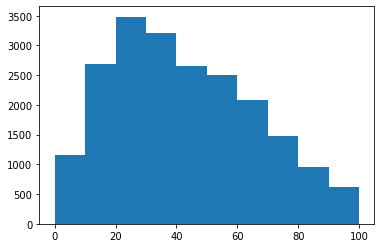

In [91]:
#1 Math and ELA together histograms
plt.hist(renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')

(array([ 867., 1561., 1639., 1438., 1197., 1113.,  989.,  699.,  525.,
         297.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

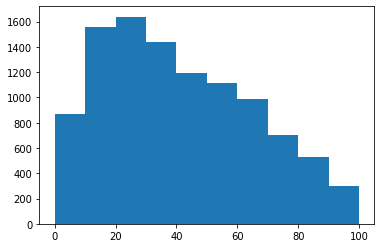

In [114]:
#2. Math histogram
plt.hist(math_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')


(array([ 294., 1124., 1845., 1780., 1463., 1387., 1086.,  775.,  436.,
         317.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

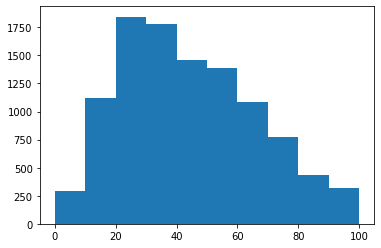

In [119]:
#3. ELA histogram
plt.hist(ela_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')

In [108]:
#1. Math and ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
MandELA_mean = renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
MandELA_median = renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
MandELA_var = renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
MandELA_std = renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
MandELA_max = renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
MandELA_min = renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

summary = pd.concat([MandELA_mean, MandELA_median, MandELA_var, MandELA_std, 
                     MandELA_max, MandELA_min], axis=1, join='inner')

summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,42.419986,39.3,540.682462,23.252580,100.0,0.0
1.0,45.742857,43.3,616.359410,24.826587,100.0,0.0


In [123]:
#2. Math descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
M_mean = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
M_median = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
M_var = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
M_std = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
M_max = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
M_min = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

m_summary = pd.concat([M_mean, M_median, M_var, M_std, 
                     M_max, M_min], axis=1, join='inner')

m_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
m_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,40.78826,37.5,594.006943,24.372258,100.0,0.0
1.0,43.49708,39.1,658.207244,25.655550,100.0,0.0


In [124]:
#3. ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
ela_mean = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
ela_median = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
ela_var = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
ela_std = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
ela_max = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
ela_min = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

ela_summary = pd.concat([ela_mean, ela_median, ela_var, ela_std, 
                     ela_max, ela_min], axis=1, join='inner')

ela_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
ela_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,44.023475,41.1,483.145606,21.980573,100.0,0.0
1.0,47.948387,46.6,567.628550,23.824956,100.0,4.1


In [73]:
#1. Math and ELA together Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = renamed_df[renamed_df['Full Time'] == 1]
none_test = renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=3.1104678181853913, pvalue=0.0019598636954945635)

In [125]:
#2. Math Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = math_renamed_df[renamed_df['Full Time'] == 1]
none_test = math_renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_indResult(statistic=1.7266192169256538, pvalue=0.0853136551958103)

In [126]:
#3. ELA Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = ela_renamed_df[renamed_df['Full Time'] == 1]
none_test = ela_renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\allys\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_indResult(statistic=2.7202939268002924, pvalue=0.006914770235549835)